In [1]:
# Importing Library

In [1]:
pip install tensorflow

     |████████████████████████████████| 497.6 MB 44 kB/s s eta 0:00:01     |█████████████████████████████▉  | 464.8 MB 8.6 MB/s eta 0:00:04     |███████████████████████████████▏| 485.1 MB 7.6 MB/s eta 0:00:02
     |████████████████████████████████| 4.5 MB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.4 MB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 81 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 M

In [27]:
pip install imblearn

     |████████████████████████████████| 199 kB 3.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

2022-03-02 20:27:49.312594: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-02 20:27:49.312612: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tf.test.gpu_device_name()

2022-03-02 20:27:50.237199: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-02 20:27:50.237625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-02 20:27:50.237635: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-02 20:27:50.237649: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Dhaval-ubantu): /proc/driver/nvidia/version does not exist


''

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4952044582983364386
 xla_global_id: -1]

In [11]:
# Importing Dataset

In [12]:
!wget -O DermaData.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1

--2022-03-02 20:26:51--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘DermaData.npz’

DermaData.npz       100%[===================>]  18.81M  4.16MB/s    in 4.5s    

2022-03-02 20:26:56 (4.18 MB/s) - ‘DermaData.npz’ saved [19725078/19725078]



In [4]:
data = np.load('DermaData.npz')
print(data.files)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [5]:
print(f'Train Set:      X:%s Y:%s' %(data['train_images'].shape, data['train_labels'].shape))
print(f'Validation Set: X:%s Y:%s' %(data['val_images'].shape, data['val_labels'].shape))
print(f'Test Set :      X:%s Y:%s' %(data['test_images'].shape, data['test_labels'].shape))

Train Set:      X:(7007, 28, 28, 3) Y:(7007, 1)
Validation Set: X:(1003, 28, 28, 3) Y:(1003, 1)
Test Set :      X:(2005, 28, 28, 3) Y:(2005, 1)


In [6]:
X_train = data['train_images']
X_val = data['val_images']
X_test = data['test_images']
X = np.concatenate((X_train, X_val, X_test), axis=0)

y_train = data['train_labels']
y_val = data['val_labels']
y_test = data['test_labels']
y = np.concatenate((y_train, y_val, y_test), axis=0)

In [7]:
# Labels
labels = ['akiec',
          'bcc',
          'bkl',
          'df',
          'nv',
          'vasc',
          'mel']

In [8]:
lesion_type_dict = {
    'akiec': 'Actinic keratoses',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions ',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions',
    'mel': 'Melanoma'
}

In [9]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

In [10]:
# number of samples of each class in the whole dataset
num_classes = []
for i in range(len(labels)):
  num_classes.append(len(np.where(y==i)[0]))

pd.DataFrame(num_classes,index=labels)

,0
akiec,327
bcc,514
bkl,1099
df,115
nv,1113
vasc,6705
mel,142


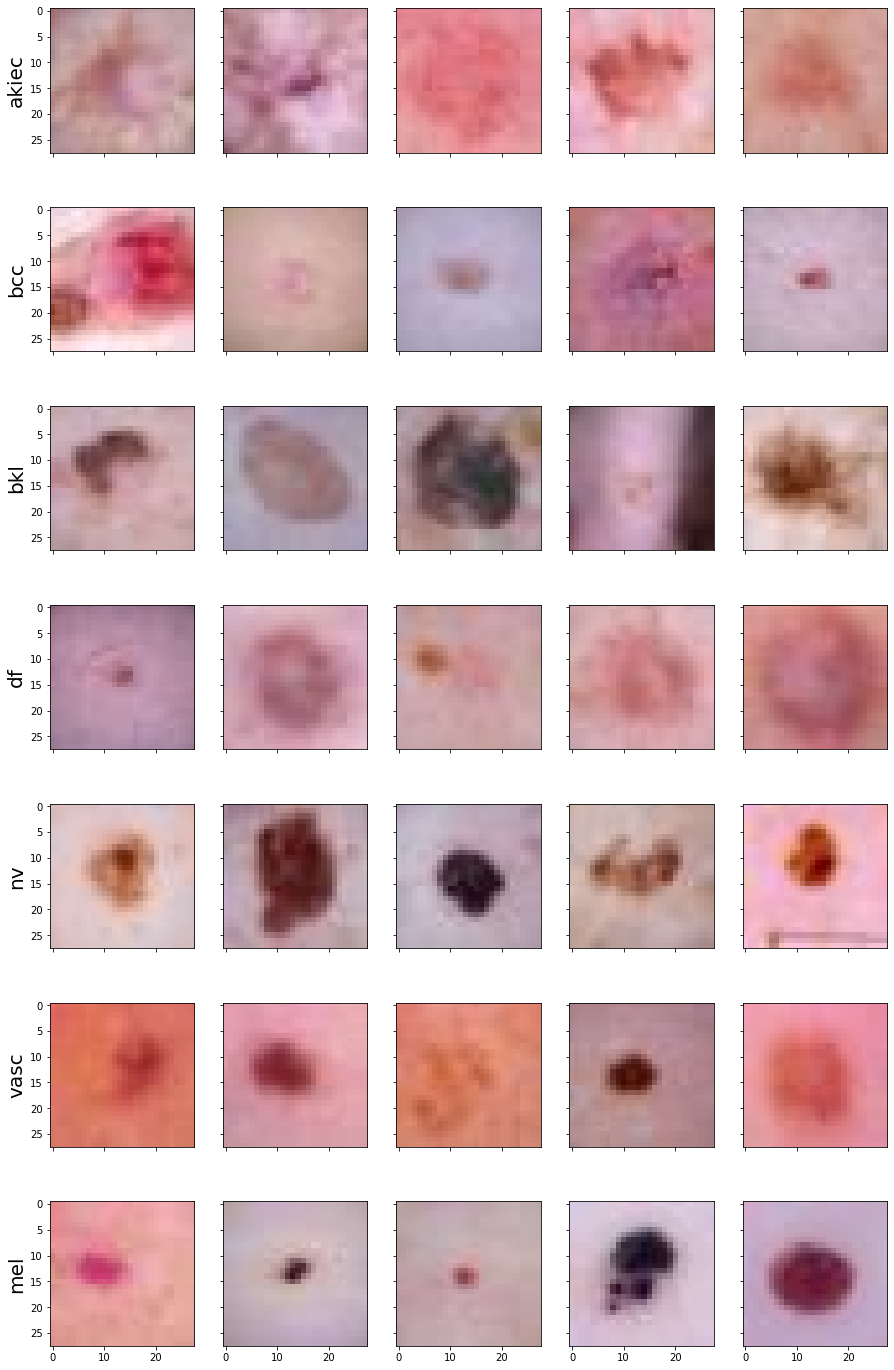

In [11]:
# Visualizing Data Set
fig, ax = plt.subplots(7, 5)
fig.set_figheight(25)
fig.set_figwidth(15)
for classes in range (7):
  for i, inx in enumerate(np.where(y==classes)[0][:5]):
    ax[classes,i].imshow(X[inx])
    ax[classes,i].set_ylabel(labels[classes],fontsize = 20.0)
    ax[classes,i].label_outer()

In [12]:
# Data Preprocessing and Augmentation

In [13]:
num_classes = []
for i in range(len(labels)):
  num_classes.append(len(np.where(y_train==i)[0]))

pd.DataFrame(num_classes,index=labels)

,0
akiec,228
bcc,359
bkl,769
df,80
nv,779
vasc,4693
mel,99


In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [15]:

os_dict = {0: num_classes[0]*7,
           1: num_classes[1]*5,
           2: 1500,
           3: 2500,
           4: 1500,
           5: num_classes[5],
           6: 1500}
oversample = RandomOverSampler(sampling_strategy=os_dict)
oversampled_X , oversampled_y = oversample.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)
print('OS_X:%s OS_y:%s' %(oversampled_X.shape, oversampled_y.shape))


OS_X:(15084, 2352) OS_y:(15084,)


In [16]:
us_dict = {0: num_classes[0]*7,
           1: num_classes[1]*5,
           2: 1500,
           3: 2500,
           4: 1500,
           5: 3000,
           6: 1500}

undersample = RandomUnderSampler(sampling_strategy=us_dict)
undersampled_X , undersampled_y = undersample.fit_resample(oversampled_X, oversampled_y)
print('US_X:%s US_y:%s' %(undersampled_X.shape, undersampled_y.shape))

US_X:(13391, 2352) US_y:(13391,)


In [17]:
undersampled_y.shape

(13391,)

In [18]:
undersampled_X = undersampled_X.reshape(-1,28,28,3)

In [19]:
num_classes = []
for i in range(len(labels)):
  num_classes.append(len(np.where(undersampled_y==i)[0]))

pd.DataFrame(num_classes,index=labels)

,0
akiec,1596
bcc,1795
bkl,1500
df,2500
nv,1500
vasc,3000
mel,1500


In [20]:
# Making Labels Categorical

In [21]:
from tensorflow.keras.utils import to_categorical
undersampled_y = to_categorical(undersampled_y)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [22]:
undersampled_y.shape

(13391, 7)

In [23]:
# Image Data Generator

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'wrap')


In [25]:
batch_size=50
train_data = train_datagen.flow(undersampled_X, undersampled_y, batch_size = batch_size, seed=1)


In [26]:
test_datagen = ImageDataGenerator(rescale = 1./255)
val_data = test_datagen.flow(X_val, y_val, batch_size=batch_size,seed=1)

In [27]:
print(f'Train Set:      X:%s Y:%s' %(train_data.x.shape, train_data.y.shape))
print(f'Validation Set: X:%s Y:%s' %(val_data.x.shape, val_data.y.shape))
print(f'Test Set :      X:%s Y:%s' %(X_test.shape, y_test.shape))


Train Set:      X:(13391, 28, 28, 3) Y:(13391, 7)
Validation Set: X:(1003, 28, 28, 3) Y:(1003, 7)
Test Set :      X:(2005, 28, 28, 3) Y:(2005, 7)


In [28]:
num_classes = []
for i in range(len(labels)):
  num_classes.append(len(np.where(np.argmax(val_data.y, axis=1)==i)[0]))

pd.DataFrame(num_classes,index=labels)

,0
akiec,33
bcc,52
bkl,110
df,12
nv,111
vasc,671
mel,14


In [29]:
# Model Creation

In [30]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout


In [31]:
input_layer = Input(shape=(28,28,3))

# convolution block 1 
cb11 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(input_layer)
cb12 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(cb11)
maxpl1 = MaxPool2D((2,2))(cb12)

#convolution block 2 
cb21 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(maxpl1)
cb22 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(cb21)
maxpl2 = MaxPool2D((2,2))(cb22)

#convolution block 3
cb31 = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(maxpl2)
cb32 = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(cb31)
maxpl3 = MaxPool2D((2,2))(cb32)

#convolution block 4
cb41 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(maxpl3)
cb42 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(cb41)
cb43 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")(cb42)
maxpl4 = MaxPool2D((2,2))(cb43)

# artificial neural network block
flat   = Flatten()(maxpl4)
dense1 = Dense(1024, activation="relu")(flat)
dense2 = Dense(1024, activation="relu")(dense1)
dense3 = Dense(1024, activation="relu")(dense2)
output = Dense(7, activation="softmax")(dense3)
model = Model(inputs=input_layer, outputs=output)

In [32]:
model.compile(optimizer= keras.optimizers.Adam(0.0001, decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])#keras.metrics.Accuracy())

In [33]:
batch_size = batch_size
epochs = 40
model_history = model.fit(train_data,
                          steps_per_epoch= int(train_data.n/batch_size),
                          epochs=epochs,
                          validation_data=val_data,
                          validation_steps=int(val_data.n/batch_size))

Epoch 1/40
267/267 [==============================] - 376s 1s/step - loss: 1.7711 - acc: 0.2932 - val_loss: 1.3955 - val_acc: 0.5990
Epoch 2/40
267/267 [==============================] - 430s 2s/step - loss: 1.5748 - acc: 0.3728 - val_loss: 1.1822 - val_acc: 0.5920
Epoch 3/40
267/267 [==============================] - 516s 2s/step - loss: 1.4086 - acc: 0.4434 - val_loss: 1.1582 - val_acc: 0.5850
Epoch 4/40
267/267 [==============================] - 400s 1s/step - loss: 1.3215 - acc: 0.4662 - val_loss: 1.1793 - val_acc: 0.5520
Epoch 5/40
203/267 [=====================>........] - ETA: 1:24 - loss: 1.2548 - acc: 0.4979

In [37]:
model_history.params

{'epochs': 40, 'steps': 267, 'verbose': 1}

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       590080    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       590080    
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 256)       590080    
                                                             

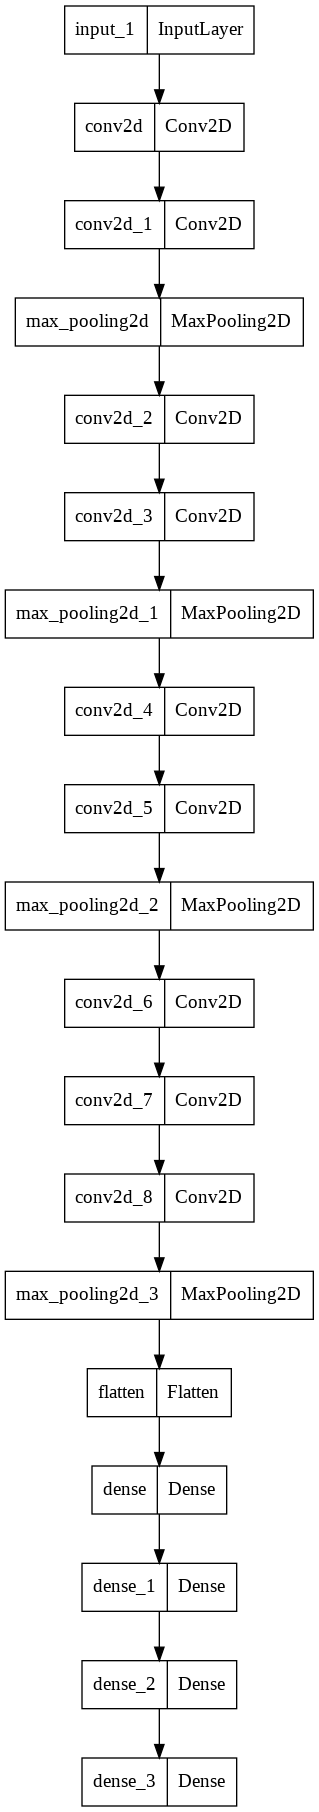

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [40]:
# Model Evaluation
score =model.evaluate(X_test/255, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 [==============================] - 2s 24ms/step - loss: 0.8750 - acc: 0.7022
Test loss: 0.8750492334365845
Test accuracy: 0.7022444009780884


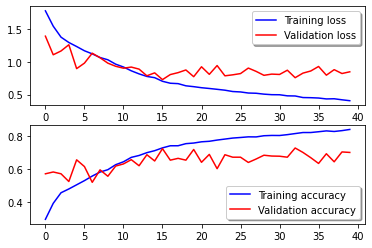

In [41]:
fig, ax = plt.subplots(2,1)
ax[0].plot(model_history.history['loss'], color='b', label="Training loss")
ax[0].plot(model_history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)


ax[1].plot(model_history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(model_history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

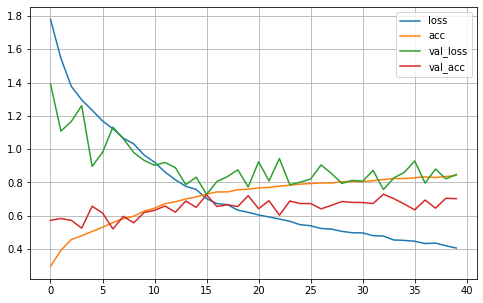

In [42]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [43]:
y_proba = model.predict(X_test/255)
y_proba.round(2)

array([[0.  , 0.  , 0.02, ..., 0.07, 0.91, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.66, ..., 0.23, 0.12, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.12, 0.88, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.99, 0.  ]], dtype=float32)

In [44]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred[:10]

array([5, 3, 2, 2, 4, 5, 5, 4, 5, 2])

In [45]:
y_pred_name = np.array(labels)[y_pred]
y_pred_name[:10]

array(['vasc', 'df', 'bkl', 'bkl', 'nv', 'vasc', 'vasc', 'nv', 'vasc',
       'bkl'], dtype='<U5')

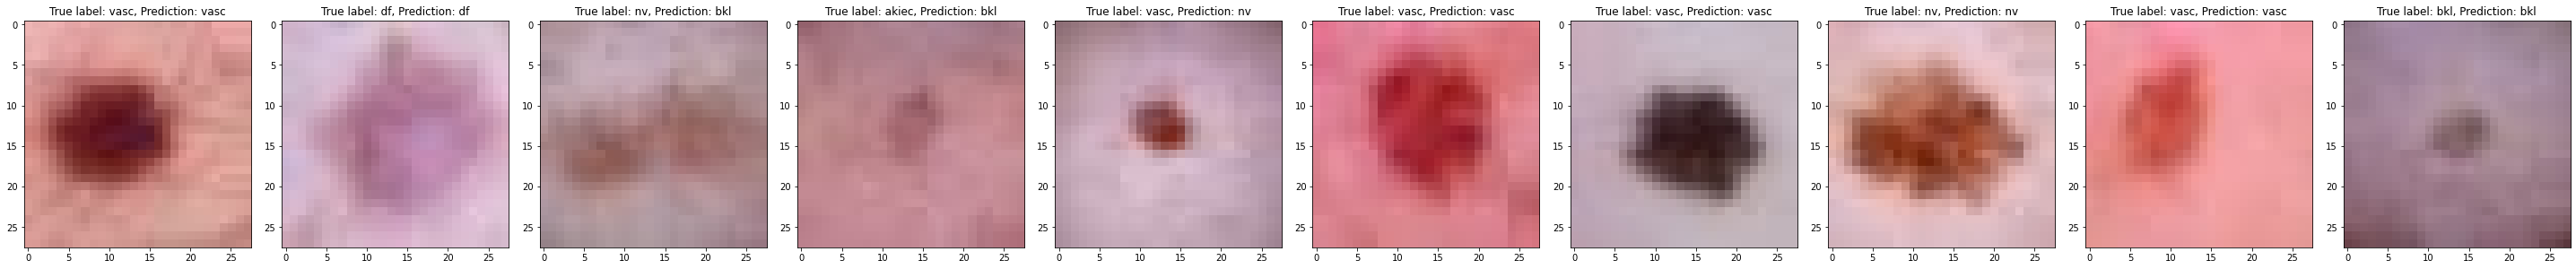

In [58]:
plt.figure(figsize=(40,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i])
    plt.title('True label: {}, Prediction: {}'.format(labels[y_test[i].argmax()], y_pred_name[i]))
   
plt.tight_layout()  

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [48]:
y_test_numbers = np.array([y.argmax() for y in y_test])

In [49]:
cm = confusion_matrix(y_test_numbers, y_pred)


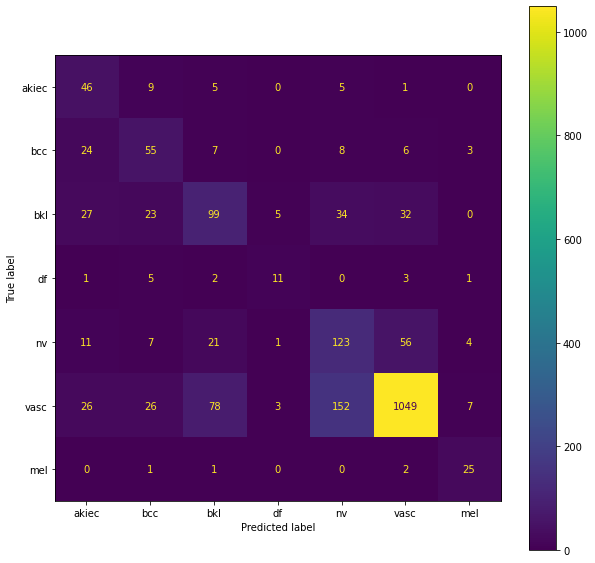

In [50]:
cm_display = ConfusionMatrixDisplay(cm,display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)

In [51]:
print(classification_report(y_test_numbers, y_pred, target_names = labels))

              precision    recall  f1-score   support

       akiec       0.34      0.70      0.46        66
         bcc       0.44      0.53      0.48       103
         bkl       0.46      0.45      0.46       220
          df       0.55      0.48      0.51        23
          nv       0.38      0.55      0.45       223
        vasc       0.91      0.78      0.84      1341
         mel       0.62      0.86      0.72        29

    accuracy                           0.70      2005
   macro avg       0.53      0.62      0.56      2005
weighted avg       0.75      0.70      0.72      2005



In [59]:
import pickle
from sklearn.externals import joblib 

In [67]:
file_dir = 'derm_model1.h5'
model.save(file_dir)

INFO:tensorflow:Assets written to: derma_model/assets
